# Vector iteration (aka power method)

We're following chapter 7 of "Lecture Notes on Solving Large Scale Eigenvalue Problems" from Prof. Dr. Peter Arbenz

In [1]:
import numpy as np
from scipy.linalg import eig, qr, hessenberg
from scipy.stats import ortho_group

from matplotlib import pyplot as plt

import seaborn as sns

sns.set_theme()
np.set_printoptions(precision=4)

## Simple vector iteration, general case

We will note $\lambda_1, \cdots, \lambda_n$ the eigenvalues of $A$, with $|\lambda_1| > |\lambda_2| \geq \cdots \geq |\lambda_n|$. This simple algorithm can find an eigenvector for the largest $|\lambda_1|$ eigenvalue.

See p. 125 for details.

In [2]:
np.random.seed(42)

diag_values = np.array([5, 4.8, 2, 1], dtype=np.double)
D = np.diag(diag_values)
n = D.shape[0]

# Build a diagonalizable, symmetric real matrix
Q = ortho_group.rvs(dim=n)
A = Q @ D @ Q.T

x = np.random.randn(n)
x /= np.linalg.norm(x)

niter = 100

hist = []

for k in range(niter):
    y = A @ x
    lam = y[0] / x[0] # we should take the index w/ largest value of x ?
    mu = np.linalg.norm(y)
    x[:] = y
    x /= mu

    hist.append((mu, lam))

print(f"We expect lam, x to be an eigenpair after convergence")
print(A @ x - lam * x)

We expect lam, x to be an eigenpair after convergence
[ 5.7170e-05  8.1520e-04 -1.2129e-03  5.2215e-03]


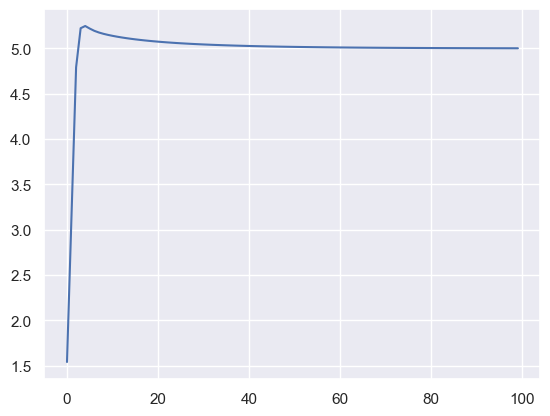

In [3]:
plt.plot([h[1] for h in hist])

## Simple vector iteration, Hermitian case

### Rayleigh coefficient

Reminder: for hermitian matrix $A$, the Rayleigh coefficients $\rho(x)$ are defined as $$\rho(x) := \frac{x^* A x}{x^* x}, ||x|| \neq 0$$

For **Hermitian** matrix $A$, there is a spectral decomposition with eigen values $\lambda_1 \leq \lambda_2 \leq \cdots \leq \lambda_n$. We have $$\lambda_1 = \min_x \rho(x), \lambda_n = \max_x \rho(x)$$

### Simple vector iteration for Hermitian matrices

See p. 132.

In [4]:
np.random.seed(42)

diag_values = np.array([5, 4.8, 2, 1], dtype=np.double)
D = np.diag(diag_values)
n = D.shape[0]

# Build a diagonalizable, symmetric real matrix
Q = ortho_group.rvs(dim=n)
A = Q @ D @ Q.T

# Vector iteration starts here
x = np.random.randn(n)
x /= np.linalg.norm(x)

y = A @ x
mu = np.conjugate(y.T) @ x

niter = 100
hist = []

for k in range(niter):
    x = y / np.linalg.norm(y)
    y = A @ x
    mu = np.conjugate(y.T) @ x

    hist.append(mu)

print(f"We expect mu, x to be an eigenpair after convergence")
print(A @ x - mu * x)

We expect mu, x to be an eigenpair after convergence
[-0.0014  0.0015  0.0002  0.0044]


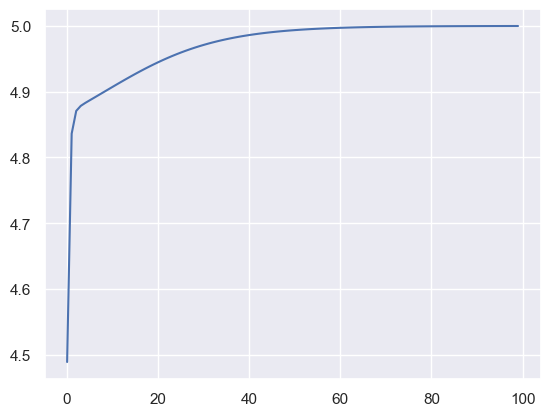

In [5]:
plt.plot(hist)

## TODO : Remaining sections

From p. 133.

- getting smallest eigenvalue
- looking at poisson 1d and reproduce graph on p. 134
- inverse iteration (shift-invert) to find arbitrary eigen values
- generalized eigenvale problem (for $B$ invertible)
- computing higher eigenvalues ($\lambda_2 \leq \cdots \leq \lambda_n$).